In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as ss
from sklearn import linear_model

### Questão 01

In [2]:
data = [1,3,5,4,0,5,1,3,5]

In [3]:
df = pd.DataFrame(data)

In [4]:
df.describe()

,0
count,9.000000
mean,3.000000
std,1.936492
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


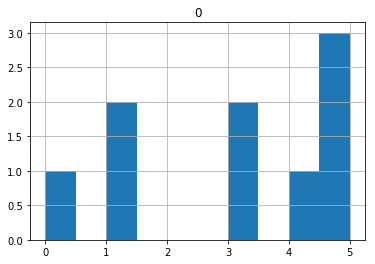

In [5]:
df.hist();

### Questão 02

In [6]:
rand = np.random.normal(loc=60, scale=10, size=5000)

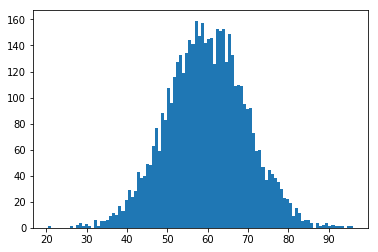

In [7]:
plt.hist(rand,bins=100);

### Questão 03

In [8]:
#Distribuição gamma
gamma_ = ss.gamma.rvs(5,loc=100,scale=22,size=5000)

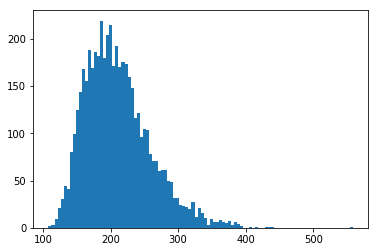

In [9]:
plt.hist(gamma_,bins=100);

In [10]:
#Distribuição de bernoulli
bernoulli_ = ss.bernoulli.rvs(0.9,loc=10,size=5000)

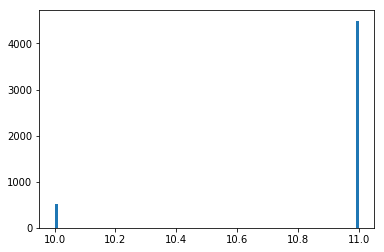

In [11]:
plt.hist(bernoulli_,bins=100);

### Questão 04

In [28]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b0, b1, x, y)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, error))
    return error

In [29]:
points = np.genfromtxt("data.csv", delimiter=",")

In [30]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 400000
erro_gradiente_descendente_manual = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 400000 iterações, obtemos b0 = 7.6021214693278365, b1 = 1.3300747241890951, error = 110.2630933813352
CPU times: user 20 s, sys: 0 ns, total: 20 s
Wall time: 20 s


In [31]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
erro_sklearn_linar_regression = compute_error_for_line_given_points(b0, b1, x, y)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, erro_sklearn_linar_regression))

b0 = 7.991020982270399, b1 = [1.32243102], error = 110.25738346621316
CPU times: user 2.05 ms, sys: 17 µs, total: 2.07 ms
Wall time: 1.85 ms


In [32]:
error_ = erro_gradiente_descendente_manual - erro_sklearn_linar_regression
print(error_)

0.005709915122039888


In [33]:
print("Coeficientes: "),
print(model.intercept_,model.coef_[0])
print("Erro: "),
print(erro_sklearn_linar_regression)

Coeficientes: 
7.991020982270399 1.3224310227553597
Erro: 
110.25738346621316


### 4.1

In [34]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 400000
erro_gradiente_descendente_manual = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...


/home/vinicius/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/vinicius/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Após 400000 iterações, obtemos b0 = nan, b1 = nan, error = nan
CPU times: user 19.5 s, sys: 7.84 ms, total: 19.5 s
Wall time: 19.5 s


In [37]:
error_ = erro_gradiente_descendente_manual - erro_sklearn_linar_regression
print(error_)

nan


### 4.2

In [55]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 89
erro_gradiente_descendente_manual = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 89 iterações, obtemos b0 = 5.797395039524365e+148, b1 = 2.9496234602465667e+150, error = 2.1688803463679651e+304
CPU times: user 5.95 ms, sys: 0 ns, total: 5.95 ms
Wall time: 6.96 ms


### Questão 05

In [56]:
X_ = [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700]
y_ = [245000,312000,279000,308000,199000,219000,405000,324000,319000,255000]

In [110]:
convert_ = 10.7639

In [147]:
%%time
x = np.array(X_)
y = np.array(y_)
learning_rate = 0.000001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 200
erro_gradiente_descendente_manual = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 85342300000.0
Executando...
Após 200 iterações, obtemos b0 = -1.2728198510490057e+142, b1 = -2.299517866726757e+145, error = 1.6383542892867307e+297
CPU times: user 15.4 ms, sys: 4 ms, total: 19.4 ms
Wall time: 15.9 ms


In [148]:
x_pred = 1100 * convert_

In [149]:
res = b0 + (b1 * x_pred)

In [150]:
print(res)

[15665.9578354]
